# Кластеризация организаций

Проведем эксперименты с кластеризацией организаций, принявших участие в проекте, отдельно по двум группам признаков, и попробуем сравнить распределение организаций по кластерам в первом и во втором случаях.

Первая группа параметров характеризует свойства организации, не связанные с конкретными действиями учителей в проекте. Это - те параметры, которые скорее являются особенностями школ независимо от того, как именно они организовали потом работу в проекте.

Вторая же группа параметров характеризует как раз то, какие показатели продемонстрировала организация во время работы в рамках проекта.

Сравнение этих двух альтернативных наборов кластеров позволит проверить, есть ли влияние параметров ДО на параметры ПОСЛЕ.


In [1]:
%run "./lib/load_big_libs.py"

In [2]:
%run "./lib/data_lib.py"

### Загружаем датафрейм по организациям

In [3]:
df_org_full = pd.read_csv("data/intermid/df_org_full.csv", sep=';')
df_org_full.drop(['Unnamed: 0'], axis=1, inplace=True)
df_org_full.head()

,org_id,protocols,protocols_base,protocols_complicated,protocols_targeted,curators,teachers,prot_templates,protocols_per_teacher,pupils_mean,...,scope_m_diff,pupils_m_diff,pupils_d_mean_diff,interactions_m_diff,interactions_d_mean_diff,attention_m_diff,attention_d_diff,vector_interact_m_diff,vector_intention_m_diff,vector_attention_m_diff
0,1,59,28,20,11,3,9,15,6.6,8.64,...,-0.06,-0.05,0.02,0.02,0.03,-0.02,0.01,-0.09,-0.03,0.00
1,68,62,24,27,11,4,9,14,6.9,21.08,...,0.06,0.13,0.01,0.10,-0.02,0.10,-0.01,0.03,0.01,0.03
2,69,32,10,14,8,1,2,15,16.0,4.88,...,0.00,0.01,0.04,0.04,0.12,0.01,0.03,0.01,0.00,NaN
3,70,35,16,14,5,1,2,13,17.5,1.80,...,0.00,-0.43,0.07,-0.40,0.13,-0.42,0.08,0.02,0.00,0.02
4,71,34,10,14,10,1,3,15,11.3,10.35,...,0.00,0.00,0.00,0.00,-0.03,0.03,-0.01,-0.05,0.00,NaN


In [4]:
# Вспомним, какие колонки попали сводый датафрейм по организациям
df_org_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   org_id                    67 non-null     int64  
 1   protocols                 67 non-null     int64  
 2   protocols_base            67 non-null     int64  
 3   protocols_complicated     67 non-null     int64  
 4   protocols_targeted        67 non-null     int64  
 5   curators                  67 non-null     int64  
 6   teachers                  67 non-null     int64  
 7   prot_templates            67 non-null     int64  
 8   protocols_per_teacher     67 non-null     float64
 9   pupils_mean               67 non-null     float64
 10  satisfaction              62 non-null     float64
 11  wish_to_change            62 non-null     float64
 12  interval_mean             67 non-null     float64
 13  interval_std              67 non-null     float64
 14  interval_mea

### 2. Параметры организаций, которые не зависели от качества работы учителей
Отбираем 4 колонки:
1. **teachers** - количество учителей школы, участвующих в проекте
2. **pupils_mean** - среднее количество учеников на уроках в школе (косвенная информация о размере школы)
3. **pupils_m** - средний уровень учеников на уроках в школе (0 - все слабые, 1 - все сильные)
4. **pupils_d_mean** - среднее значение среднеквадратичного отклонения уровня учеников в классе (0 - уровень у всех одинаковый, 0.5 - половина сильных, половина слабых)

(теоретически во второй половине года успеваемость в некоторых классах могла измениться, в том числе благодаря проекту, но вероятность того, что это могло существенно сместить средние значения, крайне низка.)

In [5]:
df_before = df_org_full[['org_id', 'teachers', 'pupils_mean', 'pupils_m', 'pupils_d_mean']]
df_before.set_index('org_id', inplace=True)
df_before

,teachers,pupils_mean,pupils_m,pupils_d_mean
org_id,,,,
1,9,8.64,0.47,0.38
68,9,21.08,0.45,0.34
69,2,4.88,0.50,0.35
70,2,1.80,0.50,0.29
71,3,10.35,0.49,0.39
...,...,...,...,...
129,6,9.89,0.52,0.38
130,5,4.45,0.47,0.33
131,5,6.53,0.48,0.38


In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [7]:
X_scaled = scaler.fit_transform(df_before)

In [8]:
X_scaled[:5]

array([[ 1.95819094, -0.16323171, -0.29641429,  0.69233102],
       [ 1.95819094,  1.88850049, -0.57224424,  0.02490399],
       [-0.90284193, -0.78336941,  0.11733065,  0.19176075],
       [-0.90284193, -1.29135456,  0.11733065, -0.80937978],
       [-0.49412295,  0.11879901, -0.02058433,  0.85918777]])

In [32]:
# Функция для показа 6 возможных парных комбинаций из 4 признаков
def show_6_scatters(data, clasters, captions):
    plt.rcParams['figure.figsize'] = (15.0, 15)
    cnt=1
    for i in range(0, 4):
        for j in range(i+1, 4):
            plt.subplot(3, 2, cnt)
            plt.scatter(data[:, i], data[:, j], c=clasters, cmap='summer', s=60)
            plt.title(f'{captions[i]} vs {captions[j]}')
            plt.ylabel(captions[j])
            #plt.show()
            cnt += 1
    

In [33]:
y_undefined = np.zeros(len(X_scaled))
y_undefined

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

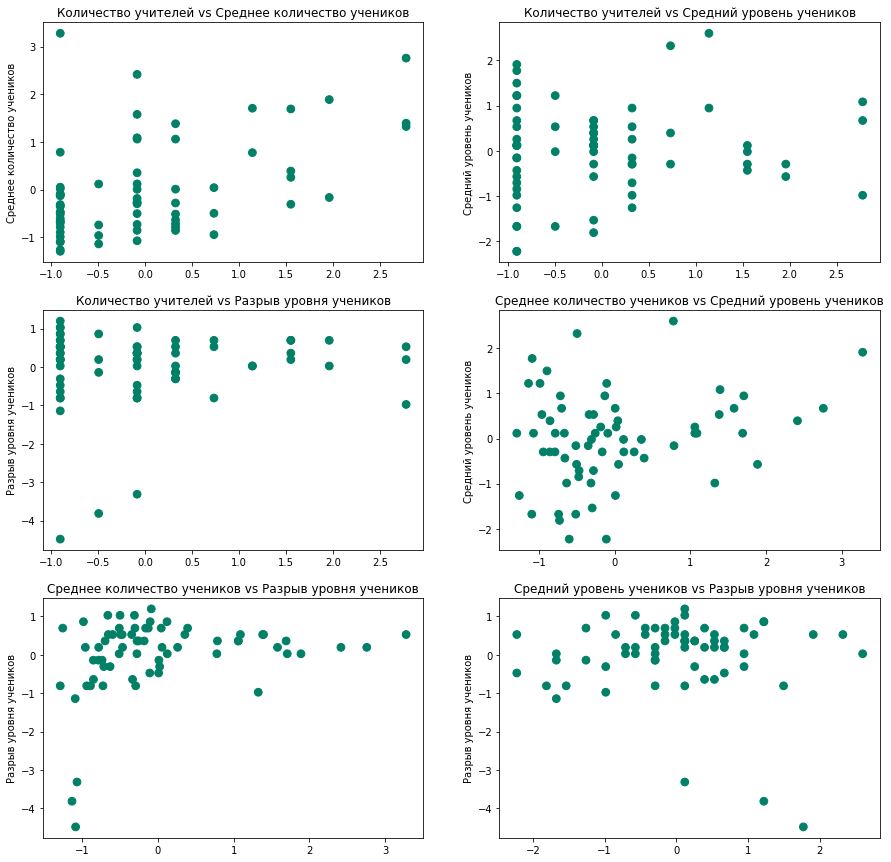

In [34]:
# Посмотрим на распределение школ по выделенным параметрам до того, как мы проведем кластеризацию
captions = ['Количество учителей', 'Среднее количество учеников', 'Средний уровень учеников', 'Разрыв уровня учеников']
y_undefined = np.zeros(len(X_scaled))
show_6_scatters(X_scaled, y_undefined, captions)

In [18]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [19]:
algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=2),
    AgglomerativeClustering(n_clusters=2),
    DBSCAN(),
]

In [ ]:
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters_random, cmap='autumn', s=60)
axes[0].set_title(get_descr("Random", y, clusters_random, X_scaled))
for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='summer', s=60)
    ax.set_title(get_descr(algorithm.__class__.__name__, y, clusters, X_scaled))
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

[-1 -1  0 -1  1  0  0 -1  0  0 -1  2  2 -1 -1  0 -1  0 -1  1 -1  2 -1 -1
 -1 -1  0  2 -1  0 -1 -1 -1  3  3 -1  1 -1  0 -1 -1 -1 -1  3 -1 -1  1 -1
 -1 -1  3 -1 -1 -1 -1  1  1 -1  3 -1 -1 -1 -1 -1  1 -1 -1]
Всего кластеров: 4. Количество выбросов (за пределами кластеров): 41
Метрика качества кластеризации: -0.11471687411416366


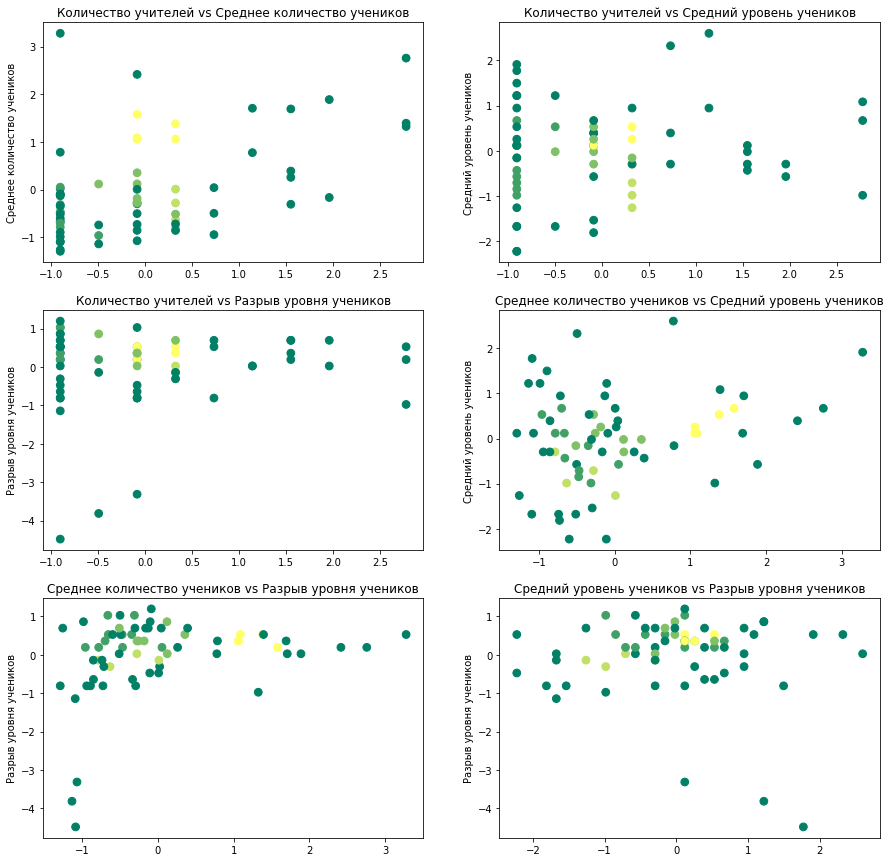

In [89]:
# Пока мы не знаем, сколько кластеров нам удастся выделить, поэтому для начала исследуем возможности алгоритма DBSCAN
model_DBSCAN = DBSCAN(eps=0.71)
clusters_DBSCAN = model_DBSCAN.fit_predict(X_scaled)
print(clusters_DBSCAN)
print(f'Всего кластеров: {len(set(clusters_DBSCAN)) - 1}. Количество выбросов (за пределами кластеров): {np.count_nonzero (clusters_DBSCAN == -1 )}')
print(f'Метрика качества кластеризации: {silhouette_score(X_scaled, clusters_DBSCAN)}')
show_6_scatters(X_scaled, clusters_DBSCAN, captions)

[ 0  0  0  1  0  0  0  0  0  0  1  0 -1  0 -1  0  0  0  0  0 -1  0  0 -1
 -1  0 -1  0  0  0 -1 -1 -1  0  0  0  0  1  0 -1 -1  0 -1  0  0  0  0 -1
  0  1  0  0 -1  0  0  0  0 -1  0 -1 -1  0  0  0  0 -1  1]
Всего кластеров: 2. Количество выбросов (за пределами кластеров): 18
Метрика качества кластеризации: -0.04103136576528005


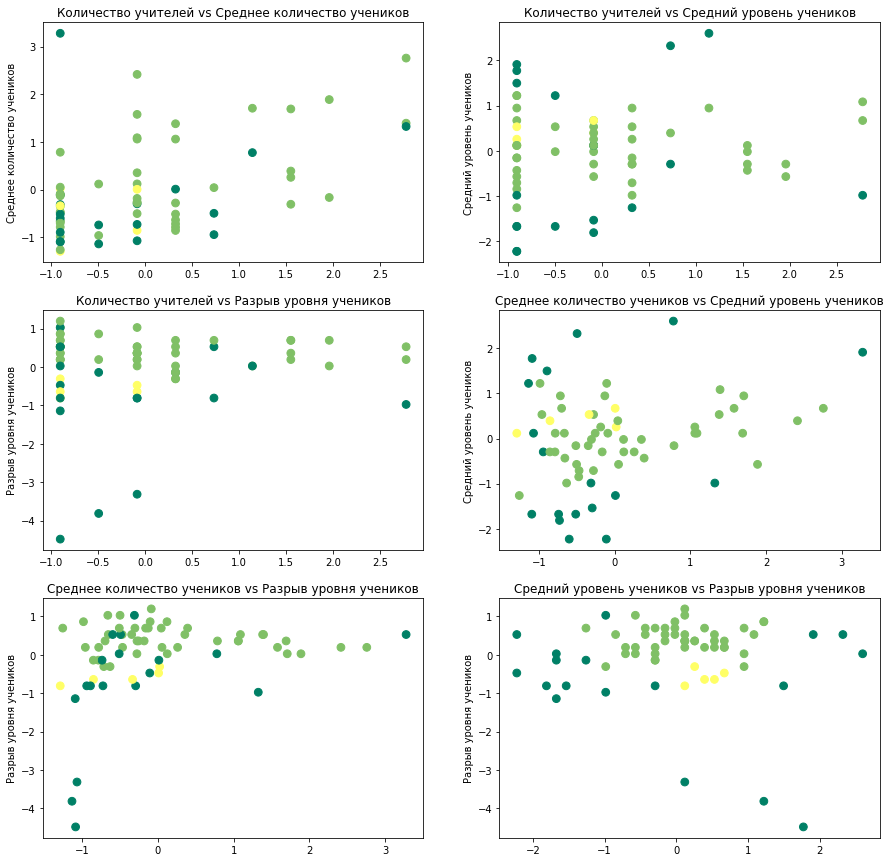

In [90]:
# Предположим, что количество учителей и среднее количество учеников в школах менее значимый фактор, чем уровень успеваемости и его распределение
model_DBSCAN = DBSCAN(eps=0.45)
clusters_DBSCAN = model_DBSCAN.fit_predict(X_scaled[:,2:])
print(clusters_DBSCAN)
print(f'Всего кластеров: {len(set(clusters_DBSCAN)) - 1}. Количество выбросов (за пределами кластеров): {np.count_nonzero (clusters_DBSCAN == -1 )}')
print(f'Метрика качества кластеризации: {silhouette_score(X_scaled, clusters_DBSCAN)}')
show_6_scatters(X_scaled, clusters_DBSCAN, captions)

#### Предварительное заключение по DBSCAN

[9 0 3 3 1 1 1 1 3 1 1 2 7 9 7 1 1 1 3 1 7 2 2 7 2 3 1 2 3 3 4 7 5 6 6 7 1
 2 1 7 7 6 8 6 0 0 3 4 1 3 6 0 0 6 9 1 2 7 6 5 3 9 9 2 2 4 2]
Всего кластеров: 10. Количество выбросов (за пределами кластеров): 0
Метрика качества кластеризации: 0.2827689828018787


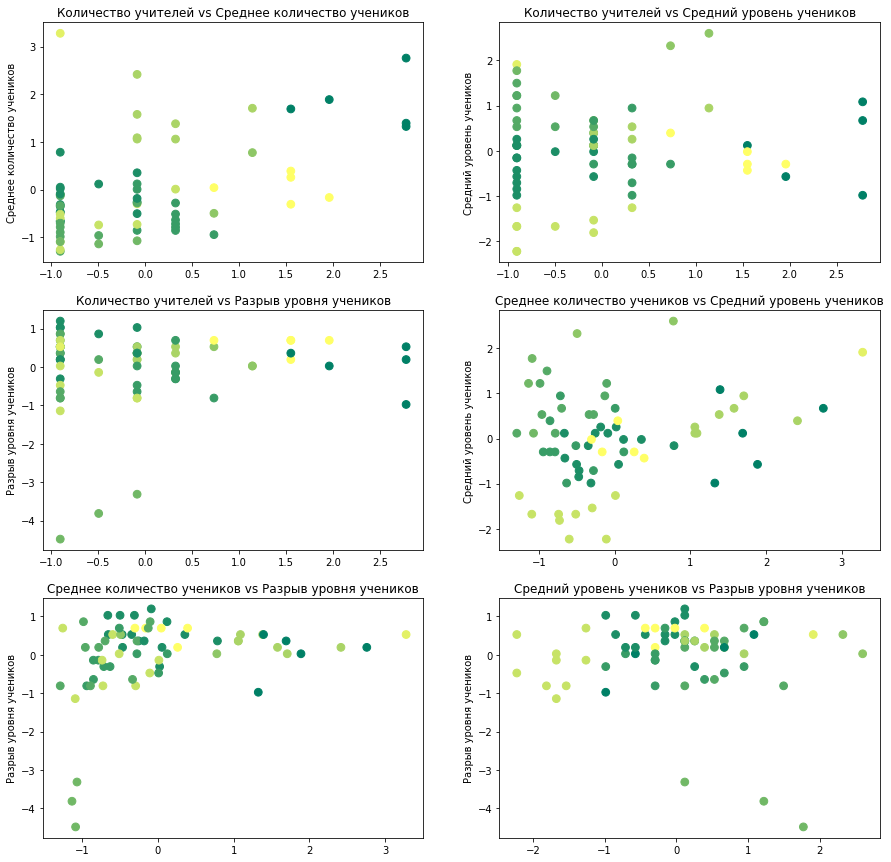

In [135]:
# Посмотрим, что нам даст метод AffinityPropagation

model_AP = AffinityPropagation(random_state=42)
clusters_AP = model_AP.fit_predict(X_scaled)
print(clusters_AP)
print(f'Всего кластеров: {len(set(clusters_AP))}. Количество выбросов (за пределами кластеров): {np.count_nonzero (clusters_AP == -1 )}')
print(f'Метрика качества кластеризации: {silhouette_score(X_scaled, clusters_AP)}')
show_6_scatters(X_scaled, clusters_AP, captions)

KMeans минимизирует сумму квадратов расстояний объектов классов до их центроидов. В обученном классификаторе это значение находится в поле inertia_

Посчитаем значения inertia при разном количестве кластеров. Они объективно стремятся к нулю с ростом числа кластеров (предельный случай: каждый объект - кластер, расстояние = 0)


In [157]:
# Посмотрим, как изменяются инерция и критерий качества sillhouette при подборе количества кластеров
def calc_metrics_for_clasters_count(df, max=12):
    k_inertia = []
    k_sillhouette = []
    ks2 = []
    ks = range(1,max)
    for k in ks:
        clf_kmeans = KMeans(n_clusters=k)
        clusters_kmeans = clf_kmeans.fit_predict(df, )
        k_inertia.append(clf_kmeans.inertia_)
        if len(set(clusters_kmeans))>1:
            cur_silhouette = silhouette_score(df, clusters_kmeans)
            k_sillhouette.append(cur_silhouette)
            ks2.append(k)
    return k_inertia, k_sillhouette, ks, ks2

In [158]:
k_inertia, k_sillhouette, ks, ks2 = calc_metrics_for_clasters_count(X_scaled, 11)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Изменение суммы квадратов расстояний')

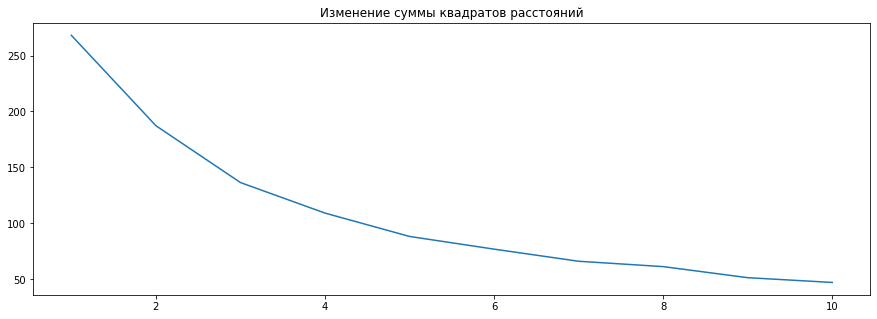

In [159]:
plt.rcParams['figure.figsize'] = (15.0, 5)
plt.plot(ks, k_inertia)
plt.title('Изменение суммы квадратов расстояний')

Text(0.5, 1.0, 'График разницы между найденными для каждого количества кластеров минимумами квадратов расстояний')

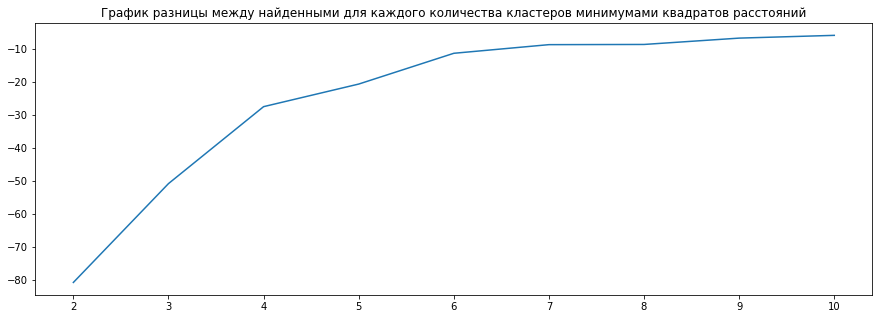

In [140]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff)
plt.title('График разницы между найденными для каждого количества кластеров минимумами квадратов расстояний')

Text(0.5, 1.0, 'Оптимум находится для количества кластеров 3')

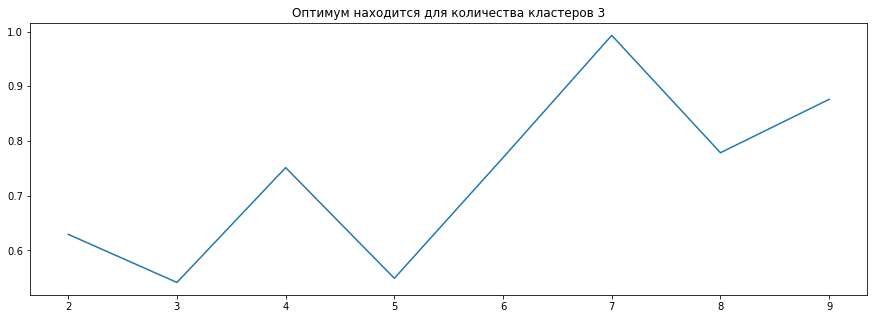

In [130]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r)
plt.title(f'Оптимальное количество кластеров {ks[1:-1][np.nanargmin(diff_r, axis=None)]}')

Text(0.5, 1.0, 'Оптимальное количество кластеров 3')

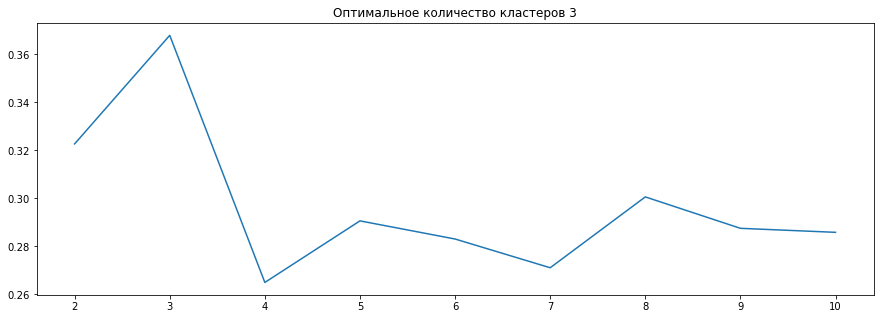

In [160]:
# Посмотрим, что даст анализ по критерию sillhouette
plt.rcParams['figure.figsize'] = (15.0, 5)
plt.plot(ks2, k_sillhouette)
plt.title(f'Оптимальное количество кластеров {ks2[np.nanargmax(k_sillhouette, axis=None)]}')

[1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 1 1 1 0 0
 0 0 0 0 1 1 1 1 1 0 2 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 2 0]
Всего кластеров: 3. Количество выбросов (за пределами кластеров): 0
Метрика качества кластеризации: 0.3679014377669732


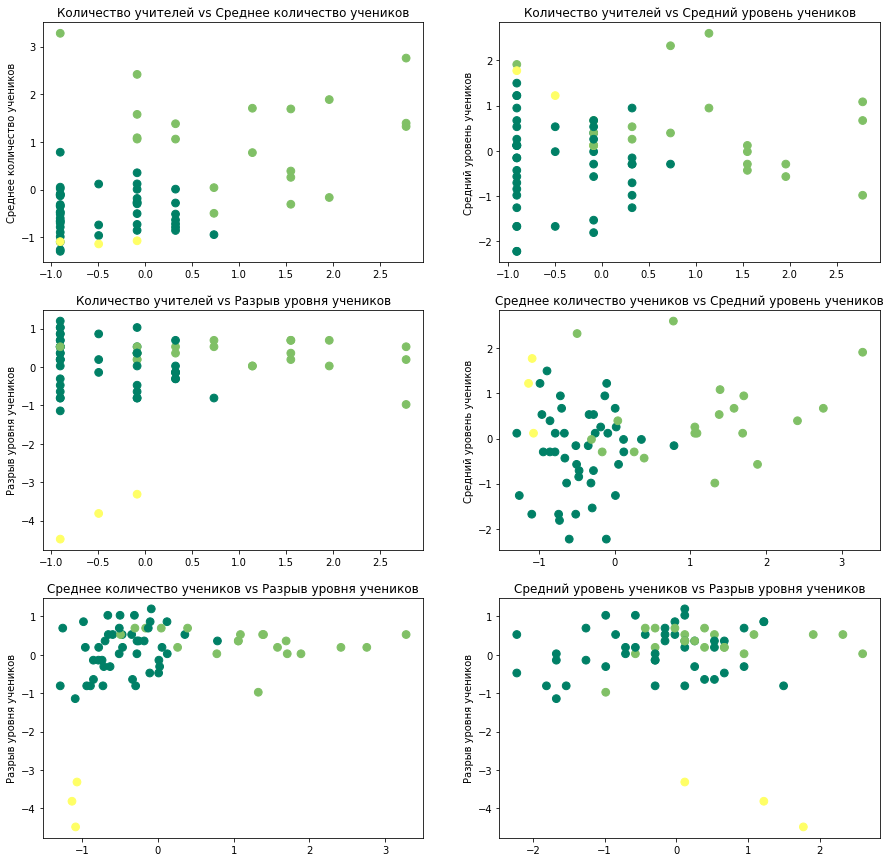

In [136]:
# Посмотрим, что нам даст метод KMeans с учетом того, что мы выбираем именно три кластера

model_KMEANS = KMeans(n_clusters=3)
clusters_KM = model_KMEANS.fit_predict(X_scaled)
print(clusters_KM)
print(f'Всего кластеров: {len(set(clusters_KM))}. Количество выбросов (за пределами кластеров): {np.count_nonzero (clusters_KM == -1 )}')
print(f'Метрика качества кластеризации: {silhouette_score(X_scaled, clusters_KM)}')
show_6_scatters(X_scaled, clusters_KM, captions)

[0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 0 0 1 1
 1 1 1 1 0 0 0 0 0 1 2 1 1 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 2 1]
Всего кластеров: 3. Количество выбросов (за пределами кластеров): 0
Метрика качества кластеризации: 0.35616791099825484


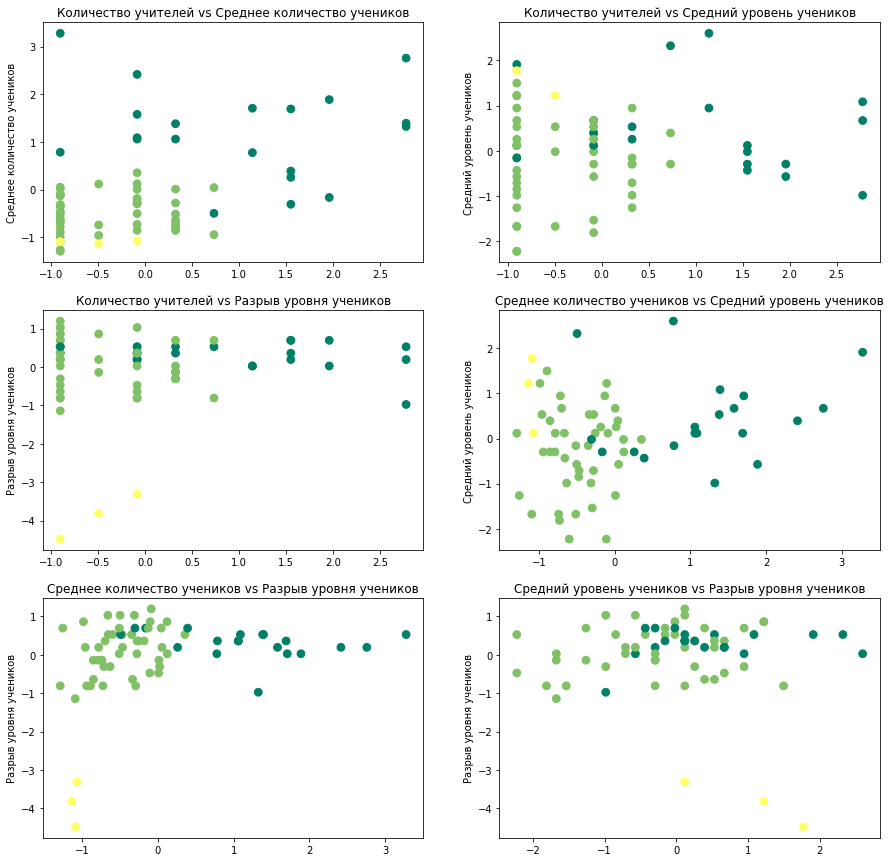

In [137]:
#Посмотрим то же самое, но с использованием AgglomerativeClustering(n_clusters=3),
model_Aggl = AgglomerativeClustering(n_clusters=3)
clusters_Aggl = model_Aggl.fit_predict(X_scaled)
print(clusters_Aggl)
print(f'Всего кластеров: {len(set(clusters_Aggl))}. Количество выбросов (за пределами кластеров): {np.count_nonzero (clusters_Aggl == -1 )}')
print(f'Метрика качества кластеризации: {silhouette_score(X_scaled, clusters_Aggl)}')
show_6_scatters(X_scaled, clusters_Aggl, captions)

### Выводы по результатам кластеризации школ



### 2. Параметры организаций, которые зависели от качества работы учителей
Отбираем все колонки, которые кажутся интересными, но потом выберем из них 4 колонки:
1. **protocols_per_teacher** - количество протоколов на одного учителя
2. **interval_std** - среднее квадратичное отклонение интервалов между уроками учителя школы
3. **interactions_m** - средний уровень взаимодействий учителей школы с учениками разного уровня на уроках(0 - учитель взаимодействовал только со слабыми учениками,1 - учитель взаимодействовал только с сильными учениками)
4. **vector_intention_m_diff** - как изменилось от весны к осени взаимодействие учителей с учениками. Этот параметр показывает, сместилось ли внимание учителей школы к более слабым или более сильным ученикам.

(теоретически во второй половине года успеваемость в некоторых классах могла измениться, в том числе благодаря проекту, но вероятность того, что это могло существенно сместить средние значения, крайне низка.)

In [151]:
df_after = df_org_full[['org_id', 'protocols_per_teacher', 'interval_std', 'interactions_m', 'vector_intention_m_diff']]
df_after.set_index('org_id', inplace=True)
df_after

,protocols_per_teacher,interval_std,interactions_m,vector_intention_m_diff
org_id,,,,
1,6.6,17.0,0.54,-0.03
68,6.9,24.0,0.51,0.01
69,16.0,9.0,0.51,0.00
70,17.5,7.0,0.57,0.00
71,11.3,6.0,0.56,0.00
...,...,...,...,...
129,16.0,7.0,0.59,0.02
130,6.6,14.0,0.51,0.01
131,8.0,10.0,0.56,-0.00


In [152]:
X_scaled2 = scaler.fit_transform(df_after)
X_scaled2[:5]

array([[-1.20874655,  1.51431136, -0.01023477, -0.88930495],
       [-1.1387903 ,  3.13580001, -0.35309942,  0.09963167],
       [ 0.98321596, -0.33881852, -0.35309942, -0.14760248],
       [ 1.33299721, -0.80210099,  0.33262989, -0.14760248],
       [-0.1127653 , -1.03374223,  0.21834167, -0.14760248]])

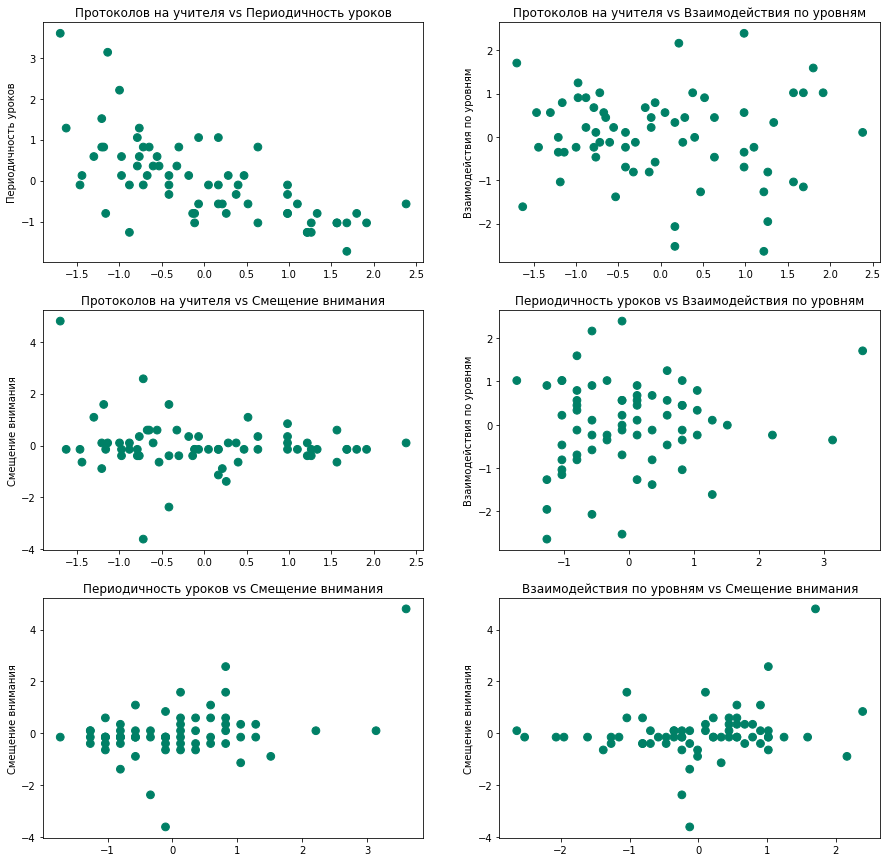

In [153]:
captions2 = ['Протоколов на учителя', 'Периодичность уроков', 'Взаимодействия по уровням', 'Смещение внимания']
show_6_scatters(X_scaled2, y_undefined, captions2)

In [161]:
k_inertia_2, k_sillhouette_2, ks_2, ks2_2 = calc_metrics_for_clasters_count(X_scaled2, 11)

C:\Users\User\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0.5, 1.0, 'Изменение суммы квадратов расстояний (параметры, которые зависят от работы учителей)')

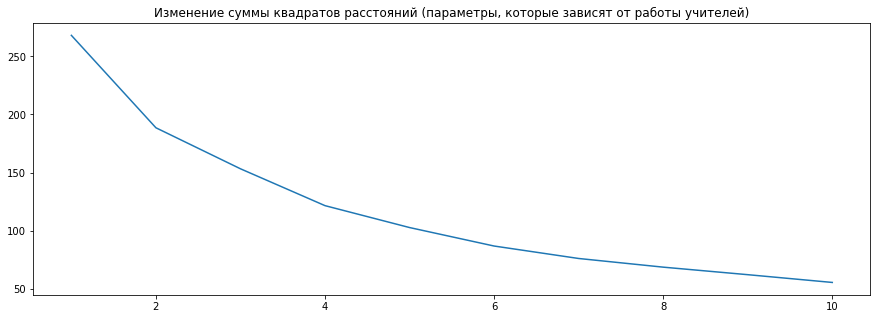

In [162]:
plt.rcParams['figure.figsize'] = (15.0, 5)
plt.plot(ks_2, k_inertia_2)
plt.title('Изменение суммы квадратов расстояний (параметры, которые зависят от работы учителей)')

Text(0.5, 1.0, 'График разницы между найденными для каждого количества кластеров минимумами квадратов расстояний')

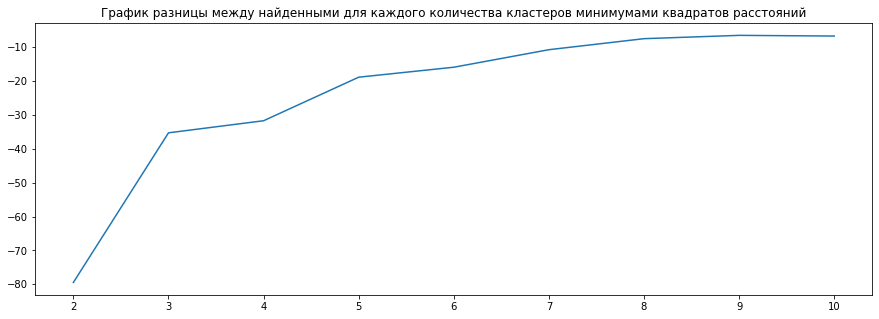

In [163]:
diff_2 = np.diff(k_inertia_2)
plt.plot(ks_2[1:], diff_2)
plt.title('График разницы между найденными для каждого количества кластеров минимумами квадратов расстояний')

Text(0.5, 1.0, 'Оптимальное количество кластеров 2')

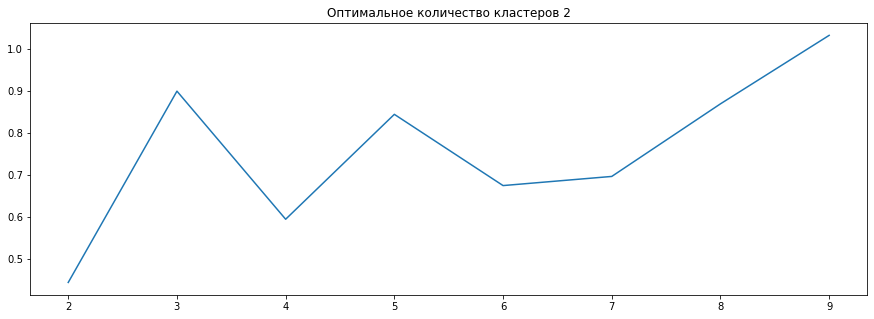

In [164]:
diff_r_2 = diff_2[1:] / diff_2[:-1]
plt.plot(ks_2[1:-1], diff_r_2)
plt.title(f'Оптимальное количество кластеров {ks_2[1:-1][np.nanargmin(diff_r_2, axis=None)]}')

Text(0.5, 1.0, 'Оптимальное количество кластеров 2. Sillhouette = 0.27224375595253336')

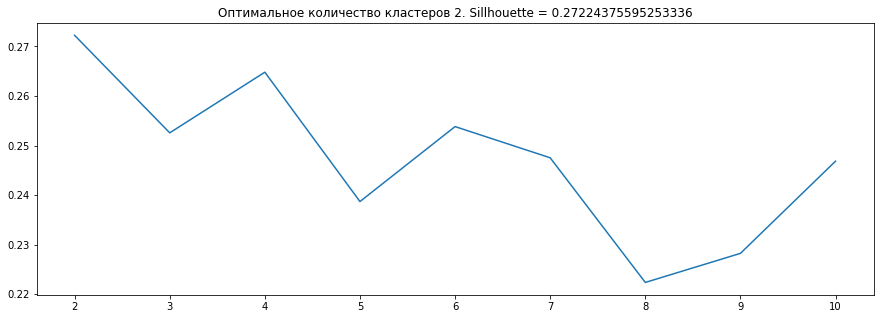

In [171]:
# Посмотрим, что даст анализ по критерию sillhouette
plt.rcParams['figure.figsize'] = (15.0, 5)
plt.plot(ks2_2, k_sillhouette_2)
plt.title(f'Оптимальное количество кластеров {ks2_2[np.nanargmax(k_sillhouette_2, axis=None)]}')

[1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1
 1 0 1 0 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 1]
Всего кластеров: 2
Метрика качества кластеризации: 0.27224375595253336


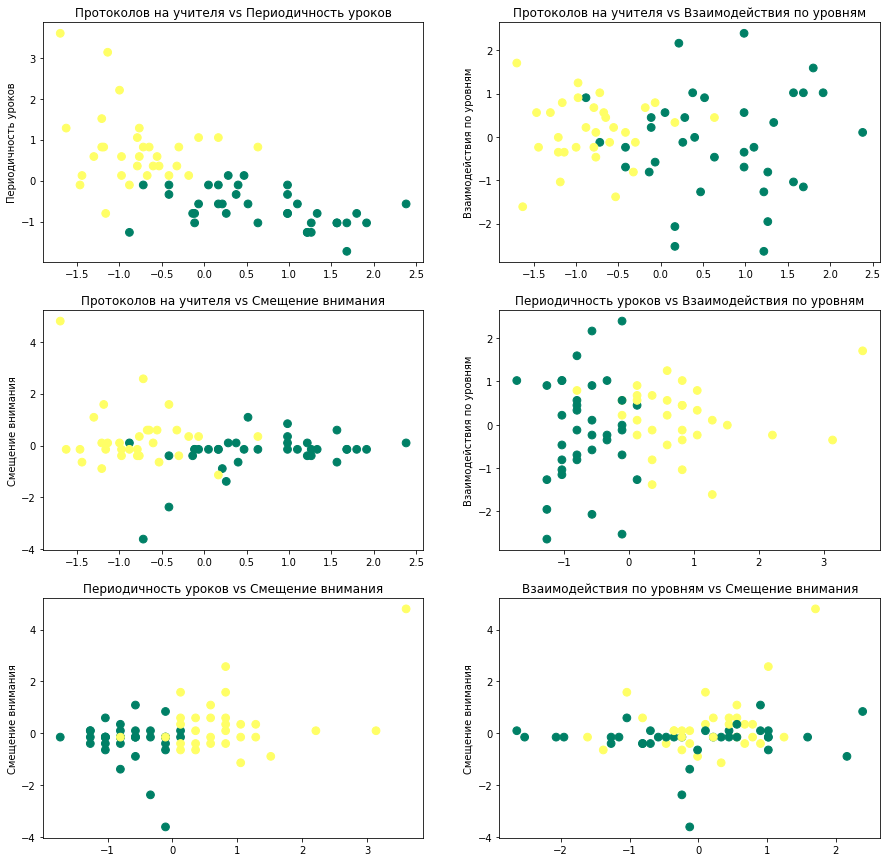

In [176]:
# Посмотрим, что нам даст метод KMeans с учетом того, что мы выбираем именно два кластера

model_KMEANS_2 = KMeans(n_clusters=2)
clusters_KM_2 = model_KMEANS_2.fit_predict(X_scaled2)
print(clusters_KM_2)
print(f'Всего кластеров: {len(set(clusters_KM_2))}')
print(f'Метрика качества кластеризации: {silhouette_score(X_scaled2, clusters_KM_2)}')
show_6_scatters(X_scaled2, clusters_KM_2, captions2)

[1 1 0 2 0 0 0 2 0 0 1 1 0 1 1 2 1 2 2 1 0 1 1 0 1 1 0 0 2 1 0 0 3 0 2 0 1
 1 0 1 0 1 1 1 0 1 2 0 1 1 1 1 1 1 1 1 0 0 1 2 2 0 2 1 1 0 1]
Всего кластеров: 4
Метрика качества кластеризации: 0.2583932639031002


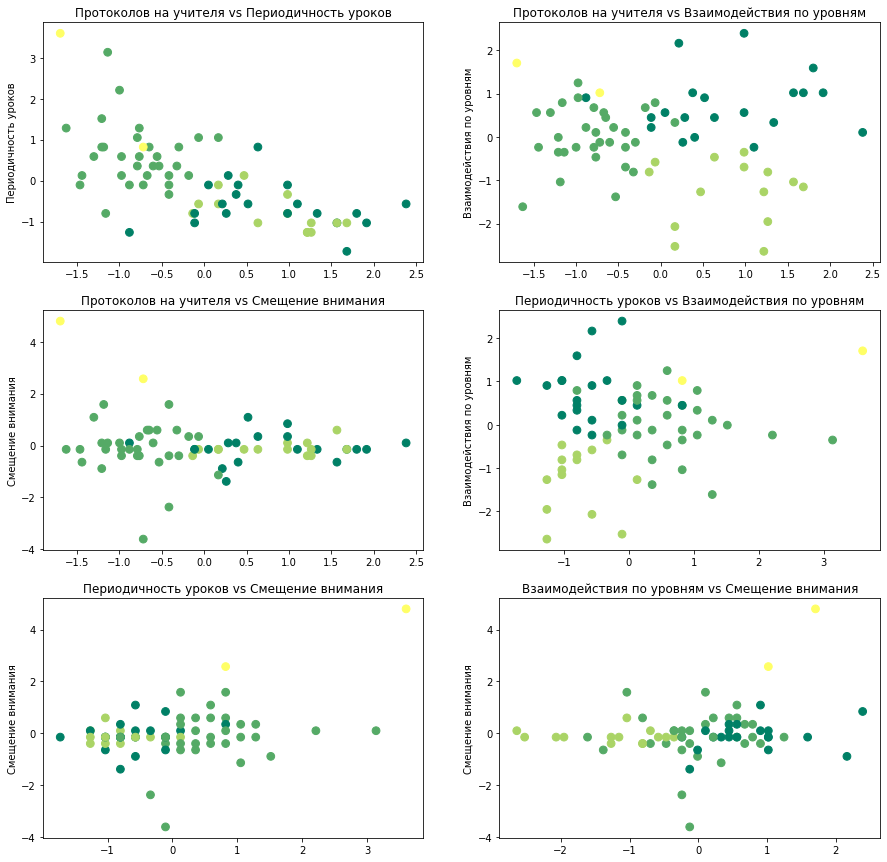

In [175]:
# Поскольку у 4 кластеров тоже неплохие шансы, посмотрим, что получится в этом случае

model_KMEANS_2 = KMeans(n_clusters=4)
clusters_KM_4 = model_KMEANS_2.fit_predict(X_scaled2)
print(clusters_KM_2)
print(f'Всего кластеров: {len(set(clusters_KM_4))}')
print(f'Метрика качества кластеризации: {silhouette_score(X_scaled2, clusters_KM_4)}')
show_6_scatters(X_scaled2, clusters_KM_4, captions2)

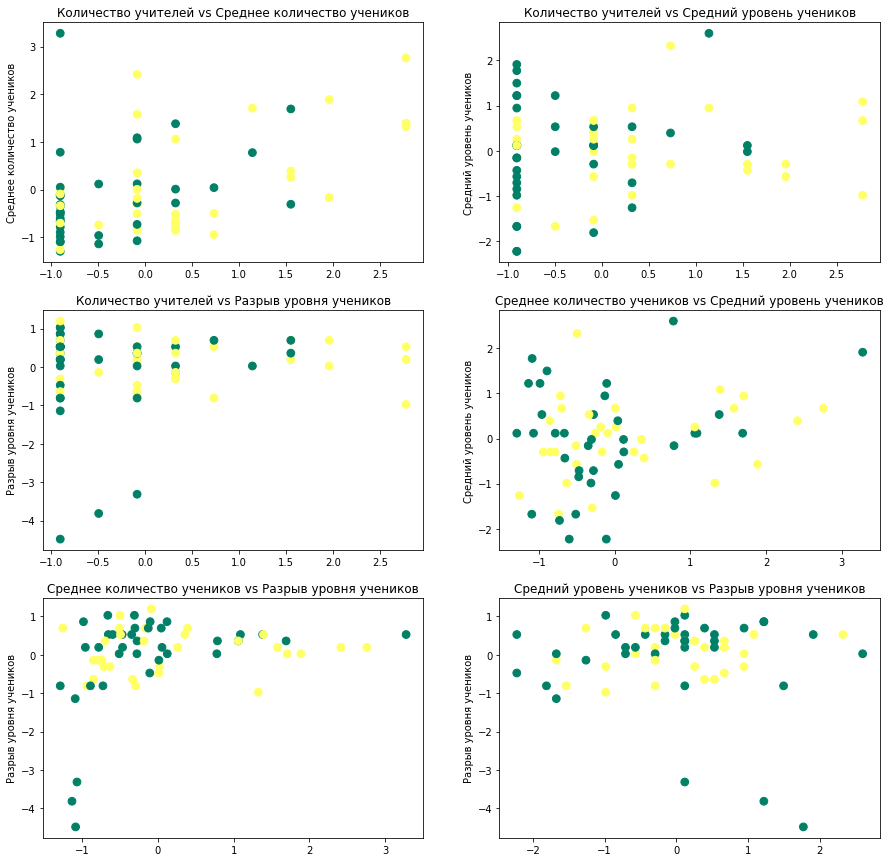

In [177]:
# А теперь попробуем удовлетворить свое любопытство и посмотрим, как соотносятся результаты кластеризации ДО и ПОСЛЕ.
# Вначале наложим на графики распределения по параметрам ДО результаты кластеризации ПОСЛЕ
show_6_scatters(X_scaled, clusters_KM_2, captions)

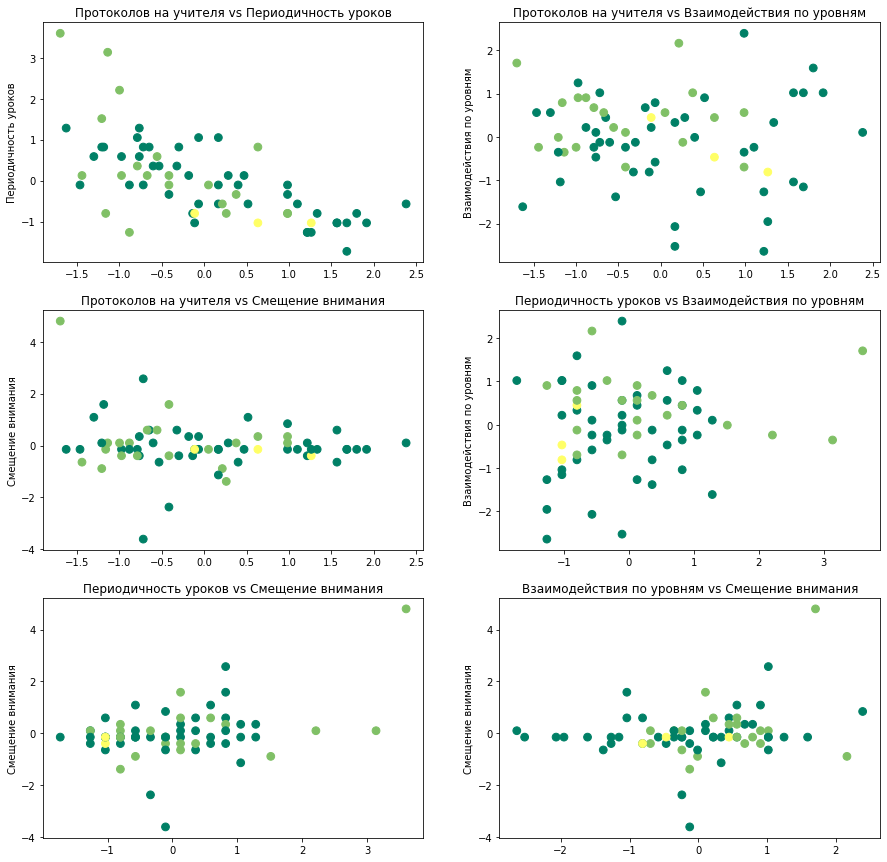

In [179]:
# А теперь наоборот - на распределения параметров ПОСЛЕ наложим результаты кластеризации организаций ДО
show_6_scatters(X_scaled2, clusters_KM, captions2)